<a href="https://colab.research.google.com/github/sakamoto-hands-on/DataScience_MatsuoLab_HandsOn/blob/master/DescriptiveStatistics_and_LinearRegressionAnalysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 記述統計学と単回帰分析

### [松尾研究室のデータサイエンティスト講座 公開ページ](https://weblab.t.u-tokyo.ac.jp/en/gci_contents/)を参考に、手を動かしながら学ぶ

### 環境設定とデータの取得

In [0]:
import numpy as np
import numpy.random as random
import scipy as sp
import pandas as pd
from pandas import Series, DataFrame

In [0]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

In [8]:
%precision 3

'%.3f'

In [0]:
import requests, zipfile
from io import StringIO
import io

In [0]:
zip_file_url = "http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip"
r = requests.get(zip_file_url, stream=True)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [11]:
ls

sample_data/  student-mat.csv  student-merge.R  student-por.csv  student.txt


In [0]:
student_data_math = pd.read_csv("student-mat.csv")

In [13]:
student_data_math.head()

,school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
0,"GP;""F"";18;""U"";""GT3"";""A"";4;4;""at_home"";""teacher..."
1,"GP;""F"";17;""U"";""GT3"";""T"";1;1;""at_home"";""other"";..."
2,"GP;""F"";15;""U"";""LE3"";""T"";1;1;""at_home"";""other"";..."
3,"GP;""F"";15;""U"";""GT3"";""T"";4;2;""health"";""services..."
4,"GP;""F"";16;""U"";""GT3"";""T"";3;3;""other"";""other"";""h..."


In [0]:
student_data_math = pd.read_csv("student-mat.csv", sep=";")

In [15]:
student_data_math.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


## 練習問題をやってみる

<練習問題 1>

studet-por.csvを読み込んで、要約統計量を表示してください。

In [0]:
student_data_por = pd.read_csv("student-por.csv", sep=";")

In [17]:
student_data_por.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000




---



<練習問題 2>

以下の変数をキーとして、先ほどの数学のデータとポルトガル語のデータをマージしてください。マージするときは、両方ともに含まれているデータを対象としてください（内部結合と言います）。そして、要約統計量など計算してください。なお、以下以外の変数名は、重複がありますので、suffixes=('_math', '_por')のパラメータを追加して、どちらからのデータかわかるようにしてください。

["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

In [0]:
merged_data = pd.merge(student_data_math, student_data_por, how="inner" ,suffixes=('_math', '_por'), on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"])

In [19]:
merged_data.describe()

,age,Medu,Fedu,traveltime_math,studytime_math,failures_math,famrel_math,freetime_math,goout_math,Dalc_math,Walc_math,health_math,absences_math,G1_math,G2_math,G3_math,traveltime_por,studytime_por,failures_por,famrel_por,freetime_por,goout_por,Dalc_por,Walc_por,health_por,absences_por,G1_por,G2_por,G3_por
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,16.586387,2.806283,2.565445,1.442408,2.034031,0.290576,3.939791,3.222513,3.112565,1.473822,2.280105,3.578534,5.319372,10.861257,10.712042,10.387435,1.445026,2.039267,0.141361,3.942408,3.230366,3.117801,1.476440,2.290576,3.575916,3.672775,12.112565,12.238220,12.515707
std,1.173470,1.086381,1.096240,0.695378,0.845798,0.729481,0.921620,0.988233,1.131927,0.886229,1.282866,1.400360,7.625251,3.349167,3.832560,4.687242,0.699354,0.845571,0.513253,0.908884,0.985096,1.133710,0.886303,1.282577,1.404248,4.905965,2.556531,2.468341,2.945438
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.250000,8.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,10.000000,11.000000,11.000000
50%,17.000000,3.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,3.000000,10.500000,11.000000,11.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,12.000000,12.000000,13.000000
75%,17.000000,4.000000,4.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,14.000000,14.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000




---



<練習問題 3>

上記のマージしたデータについて、変数を幾つかピックアップして、散布図とヒストグラムを作成してみましょう。どういった傾向がありますか。また、数学データのみの結果と違いはありますか。考察してみましょう。

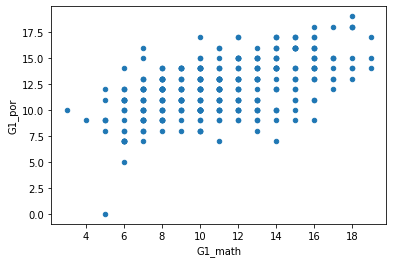

In [20]:
merged_data.plot(kind='scatter', x=u'G1_math', y=u'G1_por')

上の散布図からは、数学とポルトガル語の成績には強い正の相関が見える

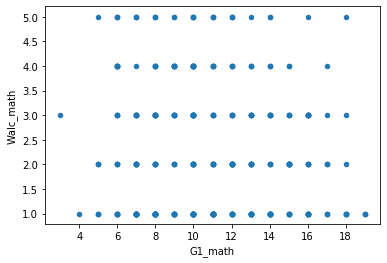

In [21]:
merged_data.plot(kind='scatter', x=u'G1_math', y=u'Walc_math')

上の散布図からは、数学の成績と週末のアルコール摂取量には相関関係は見られない



---



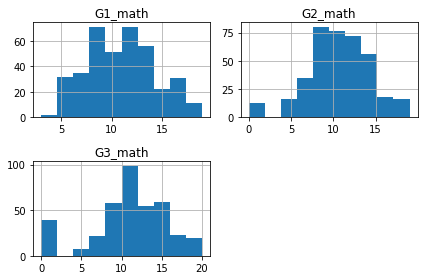

In [44]:
merged_data.loc[:,["G1_math","G2_math","G3_math"]].hist()
plt.tight_layout()
plt.show()



---



# 単回帰分析

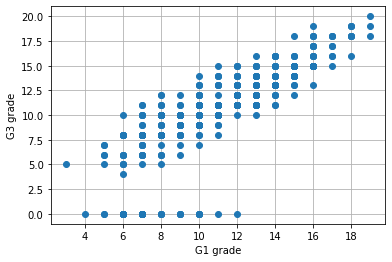

In [45]:
# 散布図
plt.plot(student_data_math.G1,student_data_math.G3, 'o')
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")
plt.grid(True)

### ざっくりと要約すると、一つの説明変数から、目的変数を予測することを「単回帰分析」というそうです。説明変数が複数ある場合には、それは「重回帰分析」

In [0]:
from sklearn import linear_model

# 線形回帰のインスタンスを生成
clf = linear_model.LinearRegression()

\begin{eqnarray}
\sum^n_{i=1}(y_i-f(x_i))^2
\end{eqnarray}

sklearnのlinear_modelを使用。
最小二乗法を用いて、係数と切片を求めて、それを微分していくのだそうです。まだ、いま一つ微分については分かっていないのですが、こういう分析に有用なのだということを学びました。

In [47]:
# 説明変数に "一期目の数学の成績" を利用
# ilocはデータフレームから、行と列を指定して取り出す。loc[:, ['G1']]は、G1列のすべての列を取り出すことをしている
# marixの型に直しているので、注意
X = student_data_math.loc[:, ['G1']].as_matrix()

# 目的変数に "最終の数学の成績" を利用
Y = student_data_math['G3'].as_matrix()
 
# 予測モデルを計算、ここでa,bを算出
clf.fit(X, Y)
 
# 回帰係数
print("回帰係数:", clf.coef_)
 
# 切片 
print("切片:", clf.intercept_)

回帰係数: [1.106]
切片: -1.6528038288004634


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


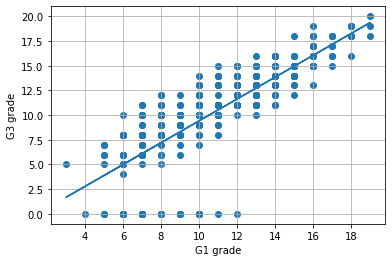

In [48]:
# 先ほどと同じ散布図
plt.scatter(X, Y)
plt.xlabel("G1 grade")
plt.ylabel("G3 grade")

# その上に線形回帰直線を引く
plt.plot(X, clf.predict(X))
plt.grid(True)

In [49]:
# 決定係数、寄与率とも呼ばれる
print("決定係数:", clf.score(X, Y))

決定係数: 0.6423508460522701


「この決定係数の数値がどこまで高ければ良いのかという問題はあります。教科書的なデータや問題では0.9以上の場合が多いですが、実務ではなかなかそこまで出せることはなく、それをどう判断するかはケースバイケースです。ちなみに、上の0.64は高くはないですが、現場レベルで見ると、使えないレベルではありません。」とのこと。現場でどれくらい有用な分析ができるのかは、やはりなかなか悩ましいチャレンジになりそうです。